In [18]:
#LIBRARIES
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from IPython import display
import seaborn as sns
import warnings
%matplotlib inline

In [32]:
#Loading the training and testing data from the keras datasets library
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x1_train, x2_test, y1_train, y2_test = train_test_split(x_test, y_test, test_size=0.6, random_state= 42, shuffle=True)

In [33]:
x1_train.shape, x2_test.shape

((4000, 32, 32, 3), (6000, 32, 32, 3))

In [34]:
#90/10 Split
x_train = np.concatenate((x_train, x1_train))
y_train = np.concatenate((y_train, y1_train))
x_test = x2_test
y_test = y2_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((54000, 32, 32, 3), (54000, 1), (6000, 32, 32, 3), (6000, 1))

In [4]:
#Adding categorical values to y_train and y_test, this array contains the classification information for each image

y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)


In [5]:
#We are finding the shape of the training and testing set. Training data has 50000 images and testing has 10000 images

x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [6]:
#Data Normalization

x_train = x_train / 255
x_test = x_test /255

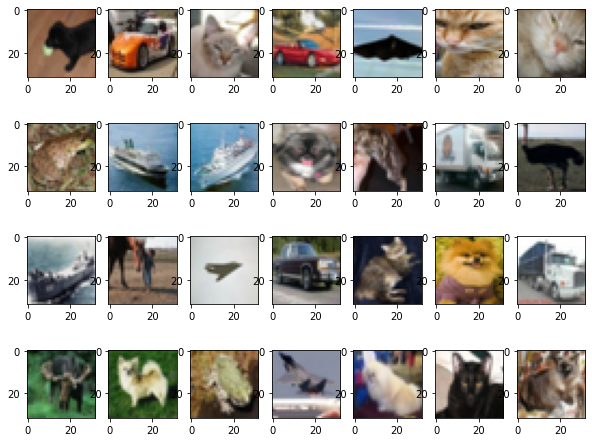

In [38]:
#Let's check out some random images to be classified

randInt = np.random.randint(0,x_train.shape[0]-1,30)
_,axs=plt.subplots(nrows=4,ncols=7,figsize=(10,8))
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[randInt[i]].squeeze())
plt.show()

In [ ]:
#Model parameters
input_shape = (32, 32, 3)
num_classes = 10

In [ ]:
#Model parameters
input = tf.keras.Input(shape=input_shape) 
x = tf.keras.layers.Conv2D(32,kernel_size=3, use_bias=False, padding='same')(input)
x = tf.keras.layers.BatchNormalization(center=True, scale=False)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32,kernel_size=3, use_bias=False, padding='same')(x)
x = tf.keras.layers.BatchNormalization(center=True, scale=False)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(32,kernel_size=5, use_bias=False, padding='same', strides=2)(x)
x = tf.keras.layers.BatchNormalization(center=True, scale=False)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(64,kernel_size=3, use_bias=False, padding='same')(x)
x = tf.keras.layers.BatchNormalization(center=True, scale=False)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64,kernel_size=3, use_bias=False, padding='same')(x)
x = tf.keras.layers.BatchNormalization(center=True, scale=False)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Conv2D(64,kernel_size=5,  use_bias=False, padding='same', strides=2)(x)
x = tf.keras.layers.BatchNormalization(center=True, scale=False)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Conv2D(128,kernel_size=4,  use_bias=False, padding='same', strides=2)(x)
x = tf.keras.layers.BatchNormalization(center=True, scale=False)(x)
x = tf.keras.layers.Activation('relu')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
output = tf.keras.layers.Dense(num_classes,activation="softmax")(x)
model = tf.keras.Model(input,output,name="convnet")
model.summary()

Model: "convnet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        864       
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 32)        96        
_________________________________________________________________
activation_14 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 32, 32, 32)        9216      
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 32)        96        
_________________________________________________________________
activation_15 (Activation)   (None, 32, 32, 32)        0   

In [ ]:
#Model Parameters
batch_size = 32
epochs = 15

#Learning rate is not constant
def scheduler(epoch, lr):
    if epoch < 3:
        return lr
    else:

        return lr * tf.math.exp(-0.1)

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
   

    # Check accuracy
        val_acc = 0.993
        val_loss = 0.025
        if(logs.get('val_accuracy') > val_acc) and ((logs.get('val_loss') < val_loss)):

            # Stop if threshold is met
            print(f"\n\nval_accuracy is reached {val_acc} and val_loss lower than {val_loss} so cancelling training!")
            print("")
            self.model.stop_training = True

stopCallback = myCallback()
lr = tf.keras.callbacks.LearningRateScheduler(scheduler)
tf.keras.callbacks.Callback()
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, callbacks=[lr,stopCallback],validation_data=(x_test,y_test))

Epoch 1/15
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3982 - accuracy: 0.5036 - val_loss: 1.1207 - val_accuracy: 0.6080
Epoch 2/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9545 - accuracy: 0.6623 - val_loss: 0.9996 - val_accuracy: 0.6521
Epoch 3/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.7864 - accuracy: 0.7232 - val_loss: 0.8966 - val_accuracy: 0.6873
Epoch 4/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6732 - accuracy: 0.7663 - val_loss: 0.8579 - val_accuracy: 0.7134
Epoch 5/15
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5887 - accuracy: 0.7945 - val_loss: 0.6346 - val_accuracy: 0.7862
Epoch 6/15
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5142 - accuracy: 0.8212 - val_loss: 0.5983 - val_accuracy: 0.7933
Epoch 7/15
1563/1563 [==============================] - 12s 7ms/step - loss: 0.4586 - accuracy: 0.8387 - val_loss: 0.5819 - val_ac

<AxesSubplot:title={'center':'final val_loss 0.5586'}, xlabel='epochs', ylabel='loss'>

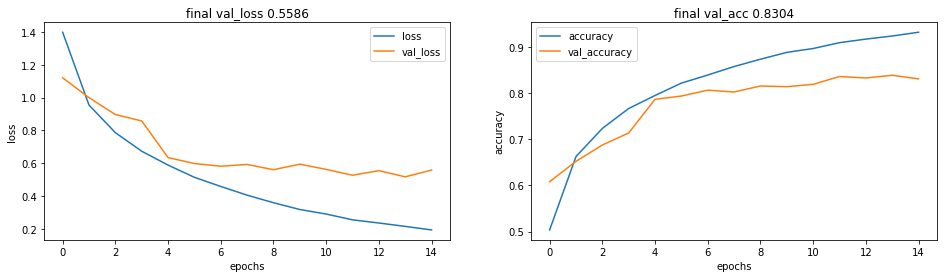

In [ ]:
_,ax = plt.subplots( ncols=2,nrows=1,figsize=(16,4))
ax[0].set_xlabel("epochs")
ax[0].set_ylabel("loss")
ax[0].set_title("final val_loss %1.4f"%(model.history.history["val_loss"][-1:][0]))
ax[1].set_xlabel("epochs")
ax[1].set_ylabel("accuracy")
ax[1].set_title("final val_acc %1.4f"%(model.history.history["val_accuracy"][-1:][0]))
pd.DataFrame([model.history.history["accuracy"],model.history.history["val_accuracy"]],index=["accuracy","val_accuracy"]).T.plot(ax=ax[1])
pd.DataFrame([model.history.history["loss"],model.history.history["val_loss"]],index=["loss","val_loss"]).T.plot(ax=ax[0])


In [ ]:
true_y = np.argmax(y_test,axis=1)
true_y

array([3, 8, 8, ..., 5, 1, 7])

In [ ]:
pred = np.argmax(model.predict(x_test),axis=1)

In [ ]:
pred

array([3, 8, 8, ..., 5, 1, 7])

In [16]:
class_names = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

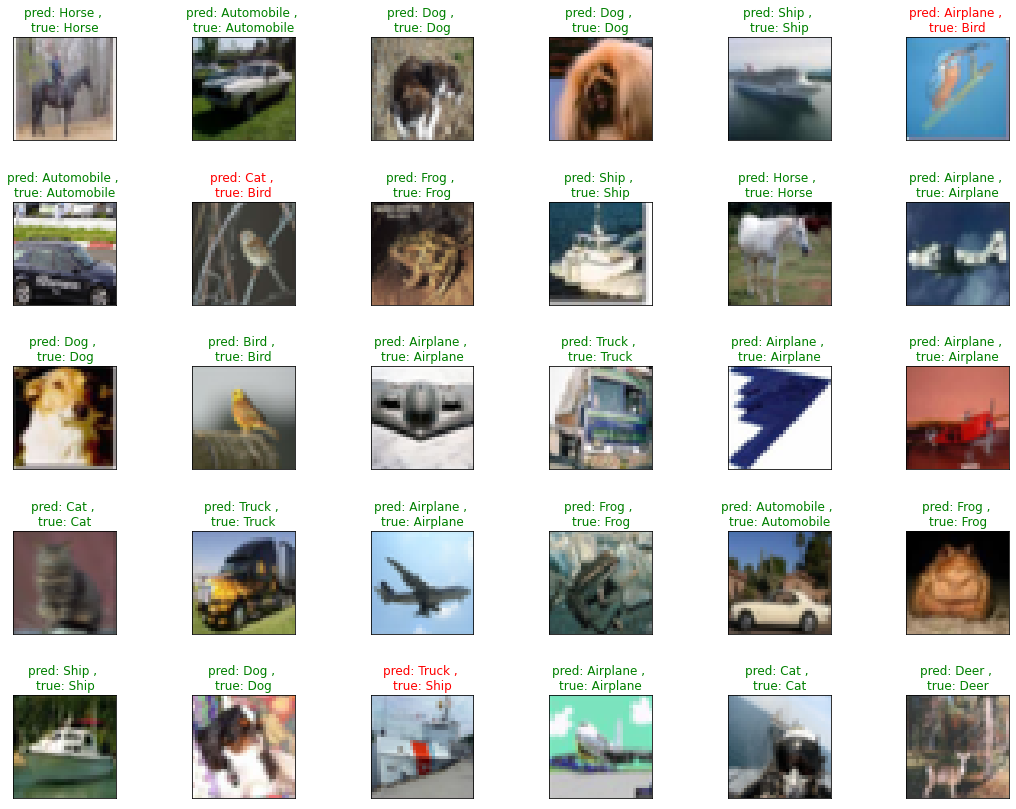

In [ ]:
randInt = np.random.randint(0,x_test.shape[0]-1,30)
_,axs=plt.subplots(nrows=5,ncols=6,figsize=(24,14))
plt.subplots_adjust(wspace=-0.6, hspace=0.6)
for i, ax in enumerate(axs.flat):
    ax.imshow(x_test4[randInt[i]].squeeze())

    if pred[randInt[i]] == true_y[randInt[i]]:
        ax.set_title( f"pred: {class_names[pred[randInt[i]]]} , \ntrue: {class_names[true_y[randInt[i]]]}" ,fontdict={"color":"green"})
    else: 
        ax.set_title( f"pred: {class_names[pred[randInt[i]]]} , \ntrue: {class_names[true_y[randInt[i]]]}" ,fontdict={"color":"red"})
    ax.set_xticks([])
    ax.set_yticks([])     
    
plt.show()